#FLIGHT  PRICE PREDICTION
vedant ulhe,siddarth katoch sujay punekar

## INTRODUCTION

Flight price prediction is the use of data analysis and machine learning techniques to forecast the cost of airline tickets for future flights. It involves analyzing historical and real-time data to model the dynamic pricing strategies of airlines, enabling travelers to make more informed decisions about booking flights and helping airlines optimize their pricing strategies. This field has become increasingly important as it empowers both passengers and airlines to navigate the ever-changing world of airfare pricing.

##DATASET DESCRIPTION




* Airlines-name of the airlines
* Date of Journey-date on which person plans to travel
* Source-location from where flight begins its journey
* Destination- the location where the flight is scheduled to land or conclude its journey
* Route-route from source to destination including stops (if any)
* Dep Time-time at which flight is scheduled to depart from source
* Arrival Time-time at which flight flight is scheduled to arrive at its destination
*Duration-total amount of time it takes for a flight to travel from its departure airport (source) to its arrival airport (destination)
* Total Stops-number of stops in between source and destination
*Additional Info-any additional information about the flight



##IMPORTING ALL THE NECESSARY LIBRARIES

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#to apply seaborn's default setting,including the color palette, grid lines, background color, and font styles,to our plots.
sns.set()

# **Reading and Understanding the Data**

In [18]:
# reading the dataset.
train_data = pd.read_excel("/content/drive/MyDrive/Data_Train.xlsx")

In [ ]:
#Display all columns
pd.set_option('display.max_columns', None)


In [19]:
# Viewing the first five rows of the dataset.
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [20]:
#gives structure and data type
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


insights-there are 11 columns and  with only one missing value in route and total_stops

In [16]:
# statistics of numerical columns
train_data.select_dtypes(exclude='object').describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


the minimum price of ticket is 1759 and maximum price is 79512 with mean of 9087.064

In [21]:
#total number of unique values
train_data["Duration"].value_counts()


2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [28]:
# statistics of categorical columns
train_data.select_dtypes(include='object').describe().T

,count,unique,top,freq
Airline,10682,12,Jet Airways,3849
Date_of_Journey,10682,44,18/05/2019,504
Source,10682,5,Delhi,4536
Destination,10682,6,Cochin,4536
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10682,222,18:55,233
Arrival_Time,10682,1343,19:00,423
Duration,10682,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10682,10,No info,8344


* jet Aurways appears maximum number of times,maximum airlines were jet airways
* Delhi appears maximum number of times,most common source was delhi
* Cochin appears maximum number of times,most common destination was Cochin

In [29]:
#checking the null values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_day        0
dtype: int64

In [32]:
#to drop Nan values
train_data.dropna(inplace = True)

#DATA PREPROCESSING

##target1-converting string values into numerical
From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into proper format so as to use this column properly for prediction


In [33]:
#Extracting days from Journey_day column
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [31]:
#Extracting days from Journey_day column
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [34]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [35]:
# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [36]:
# Similar to Date_of_Journey we can extract values from Arrival_Time
# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [37]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [38]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time

# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [39]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [40]:
#Now we can drop Duration column as it is of no use
train_data.drop(["Duration"], axis = 1, inplace = True)

In [41]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


##insights
* we divided our date of journey column into journey day and journey month
* we divided our Dep Time column into Dep hour and Dep min
* we divided our Arrival Time column into Arrival hour and Arrival min
* we divided our Duration column into Duration hour and Duration min

##Target2-Handling Categorical Data
We are going to handle categorical data by using two methods-
1.   OneHotEncoding-on Airline,Source and Destination column(Nominal data-not in order)
2.   LabelEncoding-on Total_stops column(Ordinal data-data is in order)



In [46]:
#Total number of uniques value in Airline column
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [47]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = train_data[["Airline"]]
#Dropping first category(Air Asia in this case) and creating variables
Airline = pd.get_dummies(Airline, drop_first= True)#to avoid multi-collinearity issies
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [48]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [49]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = train_data[["Source"]]
#Dropping first category(Banglore in this case) and creating variables
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [50]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [51]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]
#Dropping first category(Banglore in this case) and creating variables
Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [52]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [53]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [54]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [55]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [56]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [57]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
#As we converted these features into numerical values using OneHotEncoding we can drop them now
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [59]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [60]:
#Displaying number of rows and columns
data_train.shape

(10682, 30)

##**Test set**

In [61]:
# reading the dataset.
test_data = pd.read_excel("/content/drive/MyDrive/Test_set.xlsx")

In [62]:
# Viewing the first five rows of the dataset.
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [63]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())
# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

#EXPLORATORY DATA ANALYSIS


##Visualization of the Dataset
### *The Visualization Process Includes* :
- [Univariate Analysis](#univariate-analysis)
- [Bivariate Analysis](#bivariate-analysis)
- [Distribution of Data](#distribution-of-data)
- [Correlation Heatmap](#correlation-heatmap)

##Univariate Analysis



###### In Univariate Analaysis we will be analysing all the columns, and drawing insights from them.

In [103]:
df=pd.read_excel("/content/drive/MyDrive/Data_Train.xlsx")

In [64]:
def count_plot(data, x_column):
  #calculating the count of each unique value in the specified column (x_column) and sorts them in descending order, so the most frequent values appear first.
    counts = data[x_column].value_counts().sort_values(ascending=False)
#defining custom palette and with length equal to number of unique values
    custom_palette = sns.color_palette('Set2', len(counts))
    plt.figure(figsize=(13, 7))
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlabel=x_column, fontsize=14, fontweight='bold', color='#333333')

    ax = sns.countplot(data=data, x=x_column, order=counts.index, palette=custom_palette)

    total = len(data[x_column])
    #loop that calculates and annotates each bar with its count and percentage.
    for p in ax.patches:
        count = p.get_height()
        percentage = (count / total) * 100
        ax.annotate(f'{count}\n({percentage:.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black')
    #for clear appearence
    sns.despine()
    plt.tight_layout()
    plt.show()

###1. Analysis of Airline

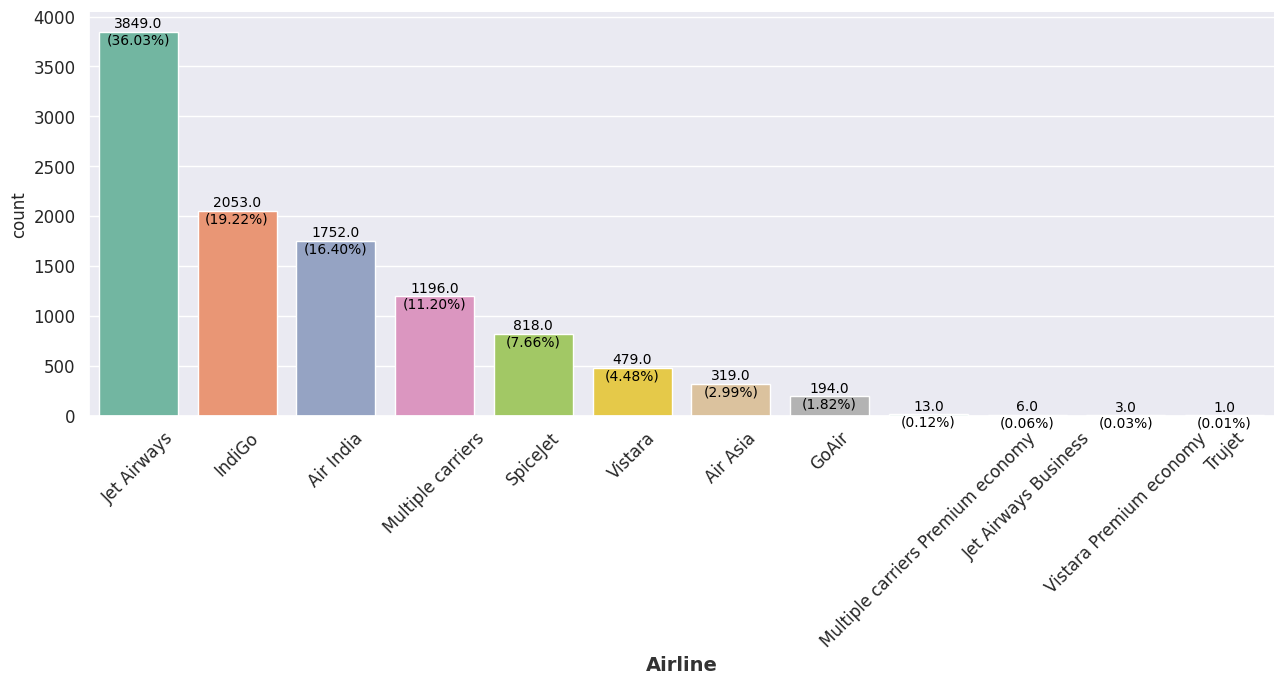

In [104]:
count_plot(df, x_column='Airline')

###Insights


*   Jet Airways is the most frequently used Airline, followed by Indigo.



###2. Analysis by Total stops

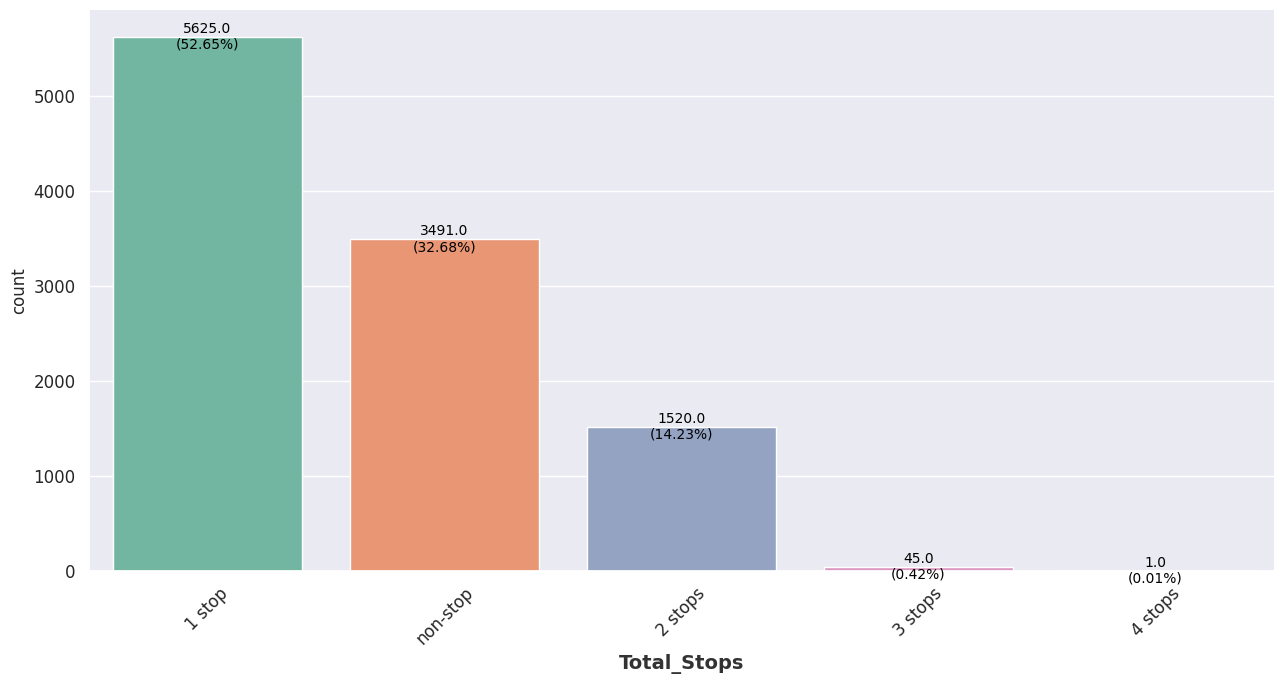

In [105]:
count_plot(df, x_column='Total_Stops')

###Insights

*   
Majority of Airlines(~53%) have one stop only.



###3. Analysis by Source

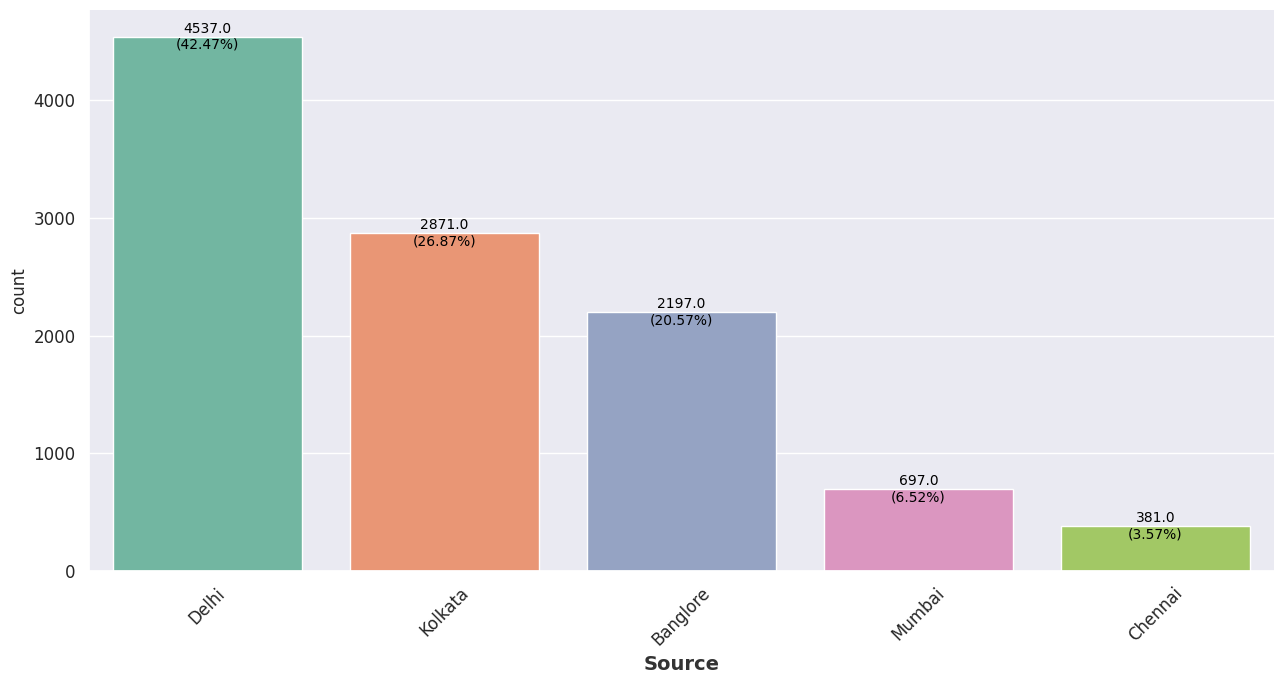

In [106]:
count_plot(df, x_column='Source')


###Insights
Delhi is the place from where majority of flight departs (~42%)

### 4. Analysis by Destination

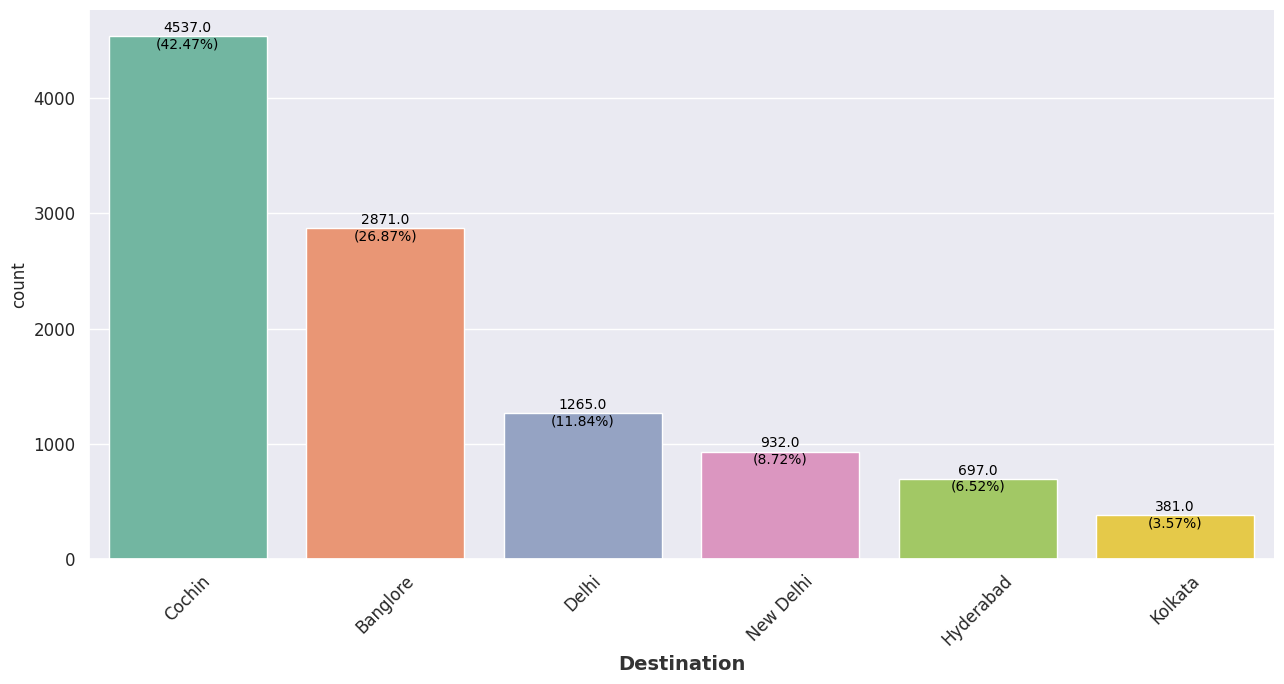

In [107]:
count_plot(df, x_column='Destination')

###Insights

Cochin is the destination for most flight (~42%)

### 5. Analysis by Departurer Time

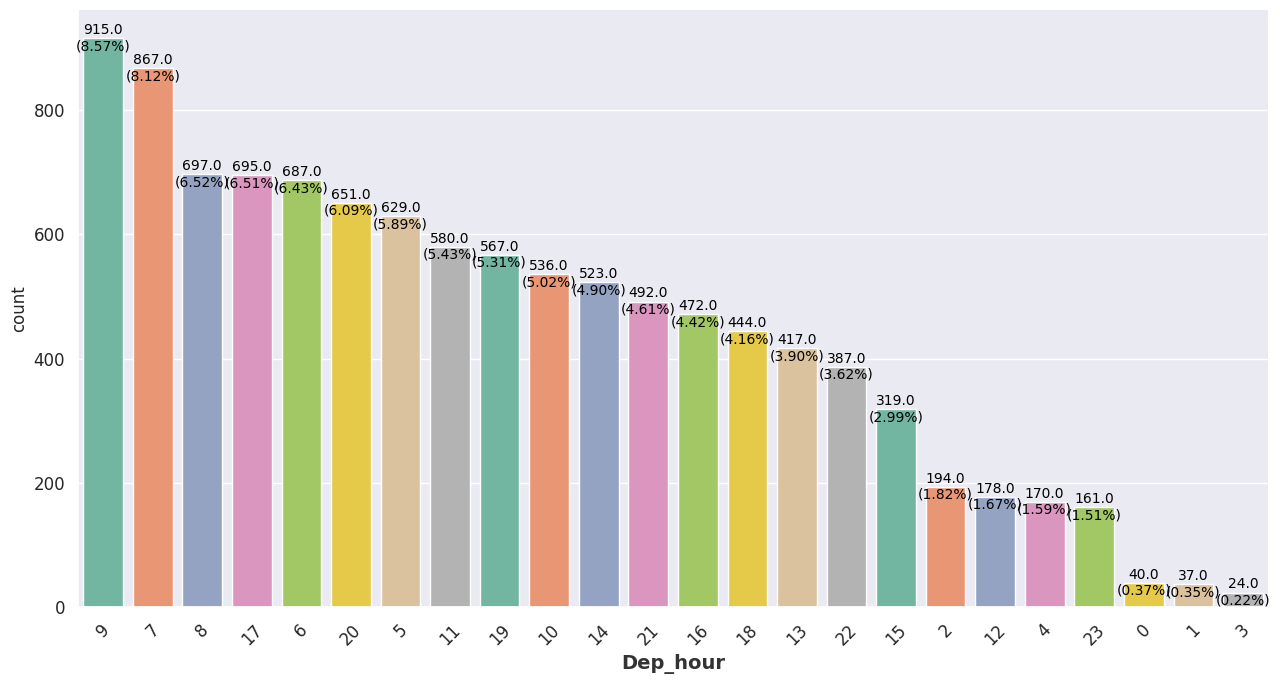

In [111]:
count_plot(train_data, x_column='Dep_hour')

### Insights
Most of the flights departs at 8:00 AM

### 6.Analysis by Arrival hour



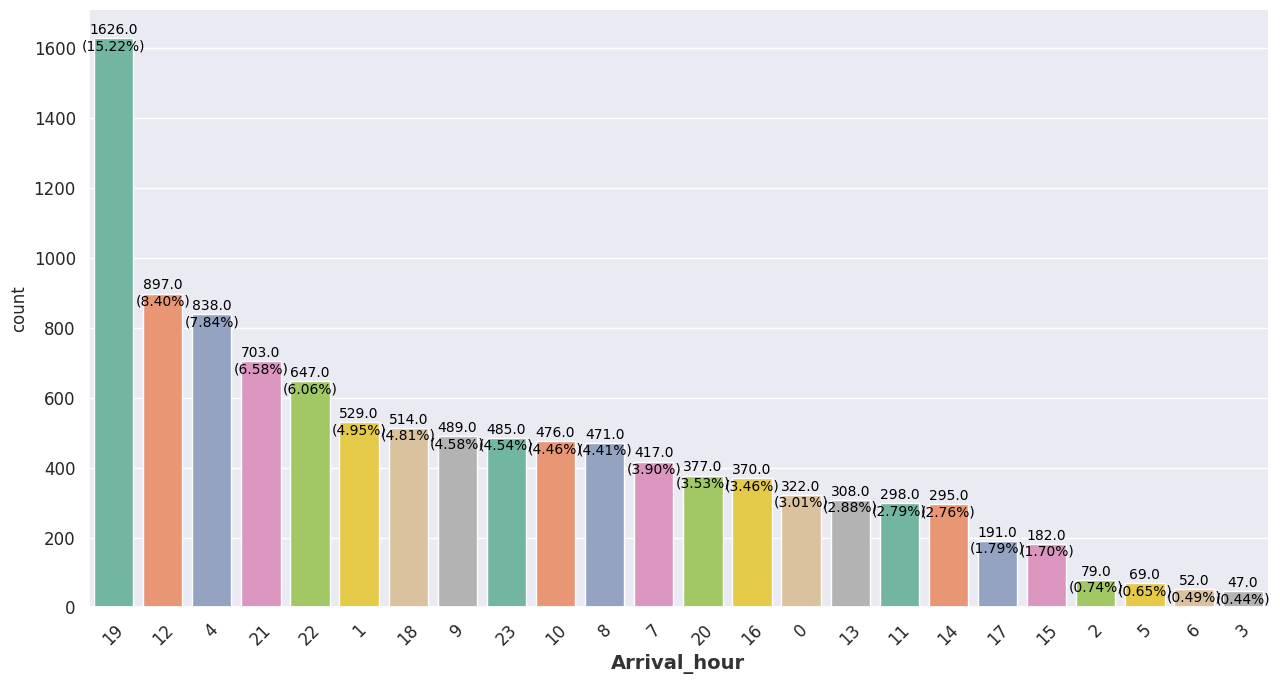

In [81]:
count_plot(data_train, x_column='Arrival_hour')

###Insights


Most of the flights arrive at 7:00 pm

### 7.Analysis by Duration hour

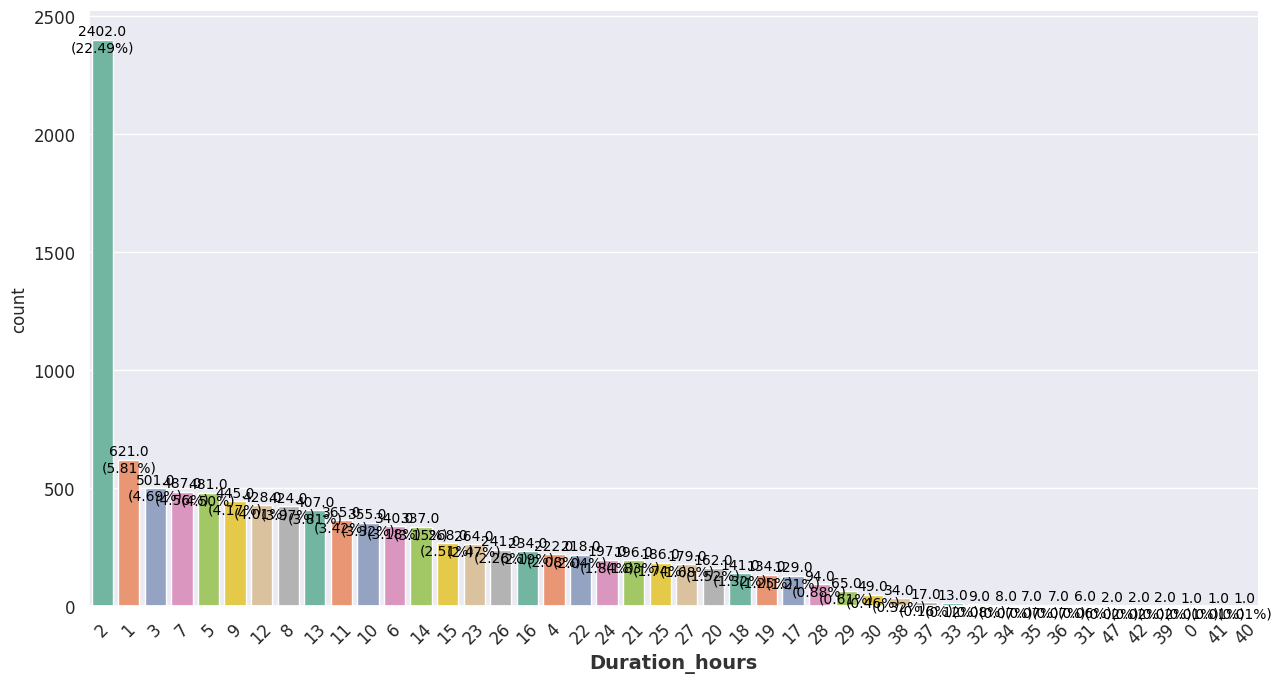

In [83]:
count_plot(data_train, x_column='Duration_hours')

###Insights
Duration time for most flights is 2 hours

## Bivariate Analysis

### 1. Average Price based on Flight Duration

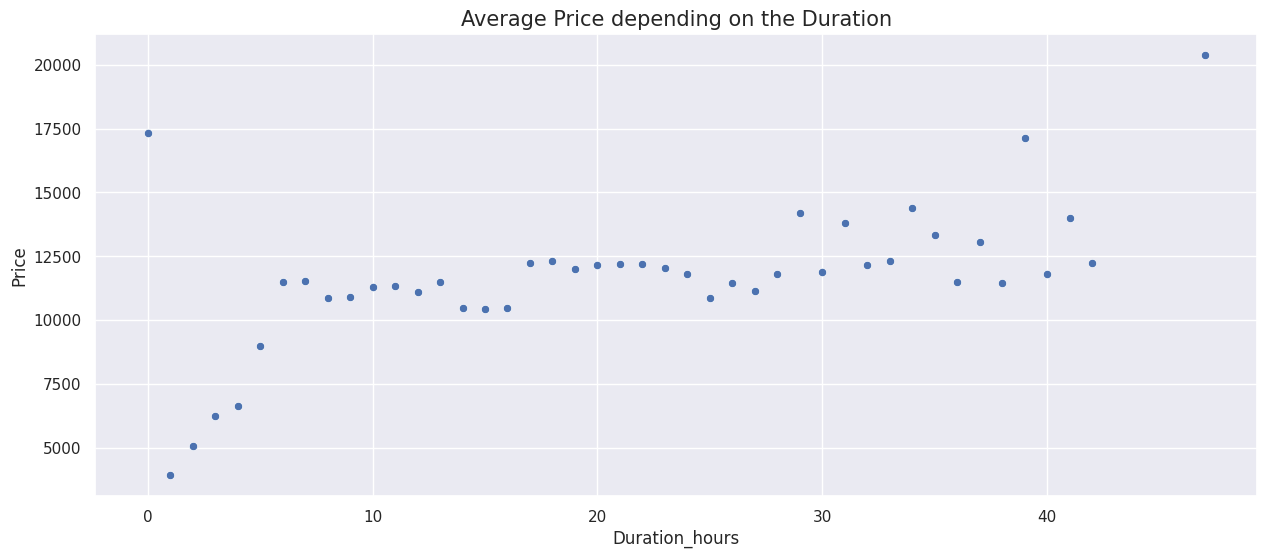

In [116]:
df_temp = train_data.groupby(['Duration_hours'])['Price'].mean().reset_index()
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="Duration_hours", y="Price", data=df_temp).set_title("Average Price depending on the Duration",fontsize=15)


### Insights
*  Flight price increses steeply as flight duration increases till 10 hours.
*  From 10 hours onwards the increase in flight price is steady.



### 2.Average Price based on Departure time

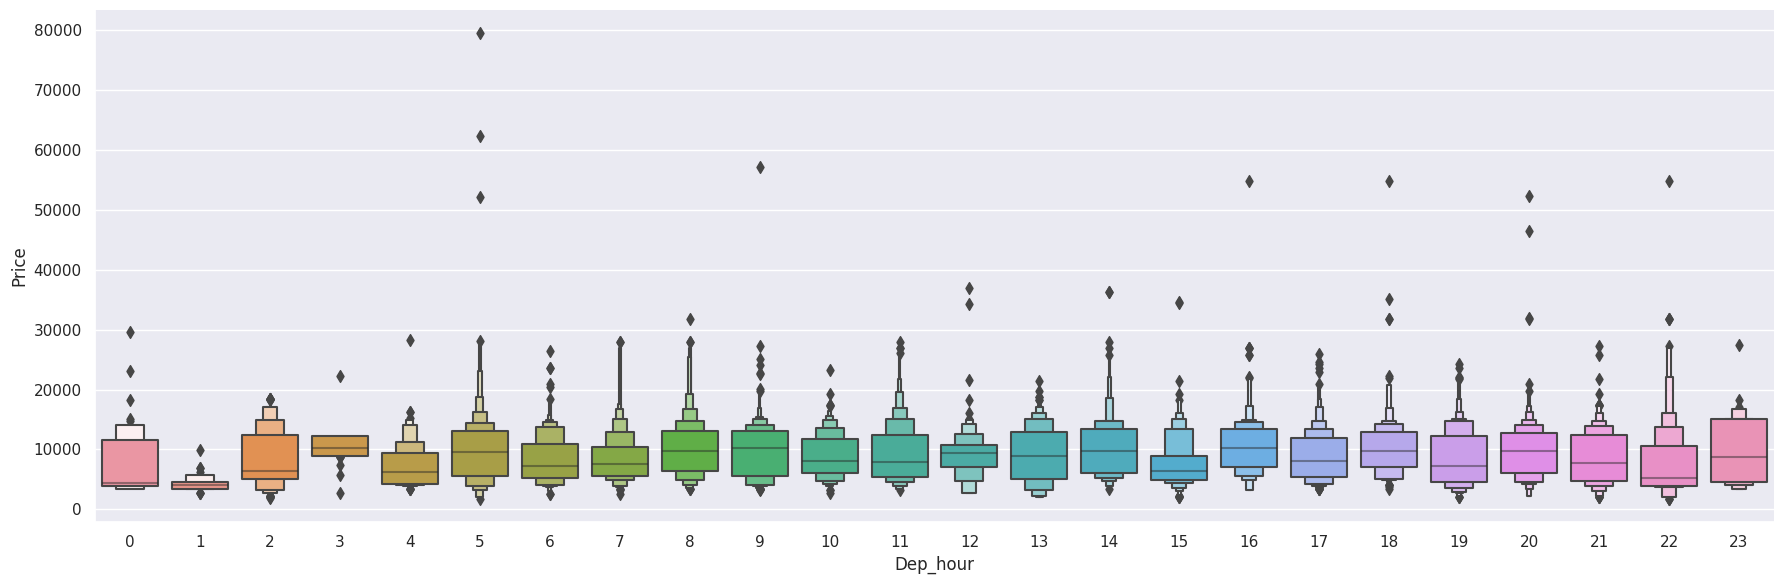

In [119]:
sns.catplot(y = "Price", x = "Dep_hour", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

###Insights
* Price for early morning departure time is cheaper



### 3.Average Price based on Arrival time

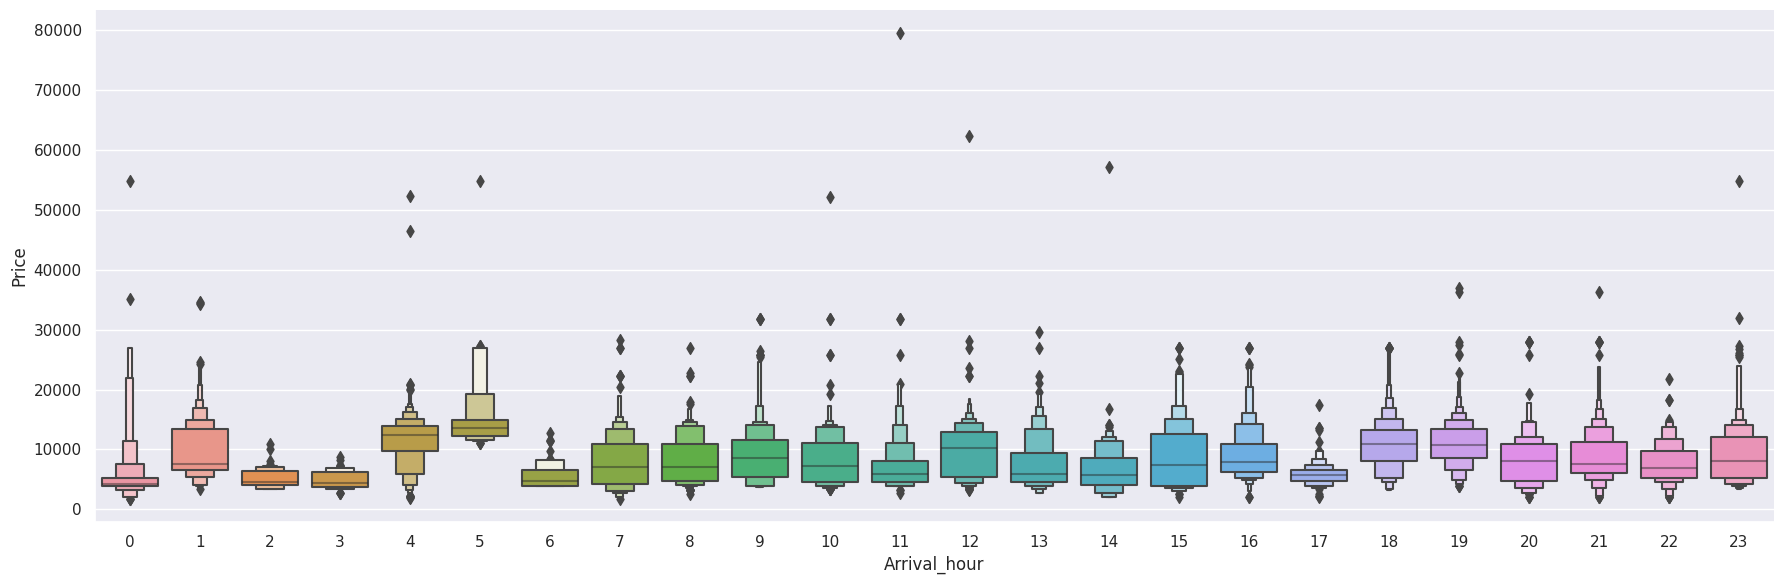

In [120]:
sns.catplot(y = "Price", x = "Arrival_hour", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

### Insights
Price for late night(6:00 pm to 10:00 pm) is cheaper

### 3. Analysis of Flight Price based on Source and Destination City

Text(0.5, 1.0, 'Airline Prices based on the Destination City')

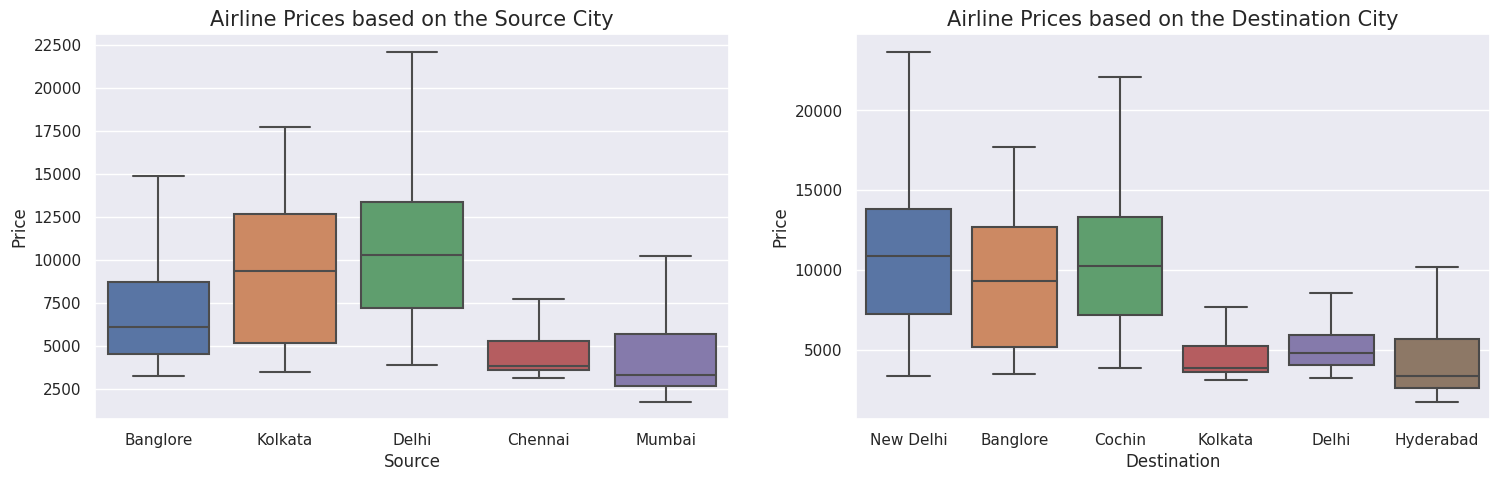

In [125]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="Price", x="Source",showfliers=False).set_title("Airline Prices based on the Source City", fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=df, y="Price", x="Destination",showfliers=False).set_title("Airline Prices based on the Destination City", fontsize=15)

### Insights
Source City:
* Ticket price is low for flight having source city as Mumbai.
* Ticket price is high for flight having source city as Delhi.
#####Destination City:
* Ticket price is low for flight having destination city as Kolkata.
* Ticket price is high for flight having destination city as Cochin.

### 4. Analysis of Flight Price based on Number of Stops

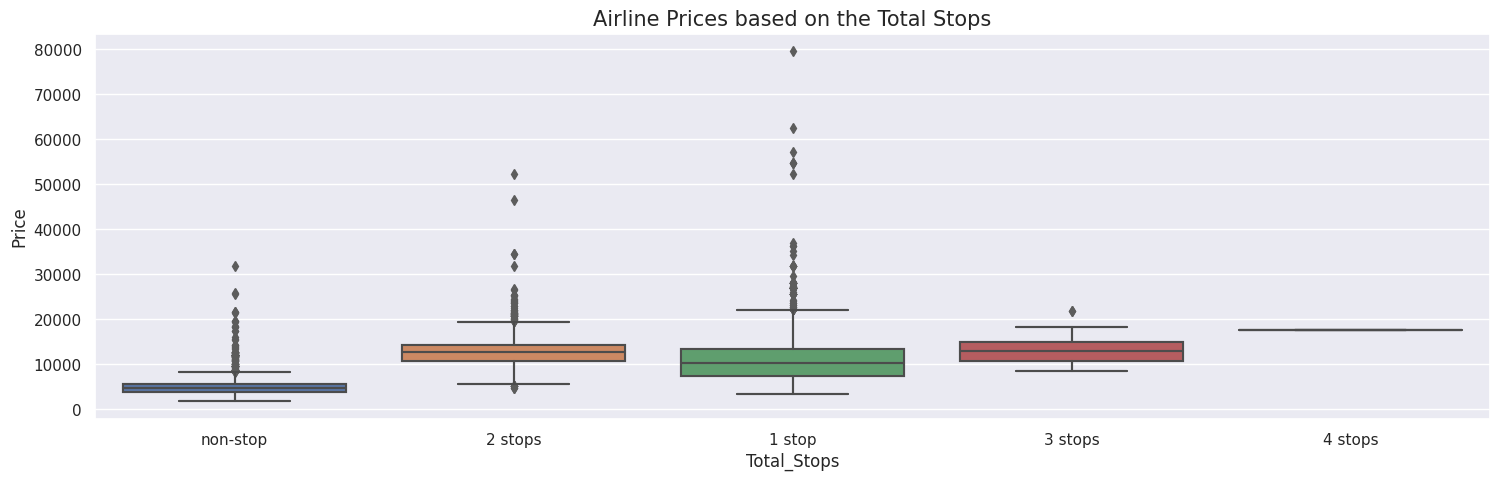

In [126]:
plt.figure(figsize=(18,5))
sns.boxplot(x='Total_Stops',y='Price',data=df,palette='hls')
sns.boxplot(data=df, y="Price", x="Total_Stops",showfliers=False).set_title("Airline Prices based on the Total Stops", fontsize=15)
plt.show()

###Insights:

* Flight with No Stops are Cheaper
* As the no. of stops increase, flight price also increases

### 5. analysis of Flight Price based on Airlines

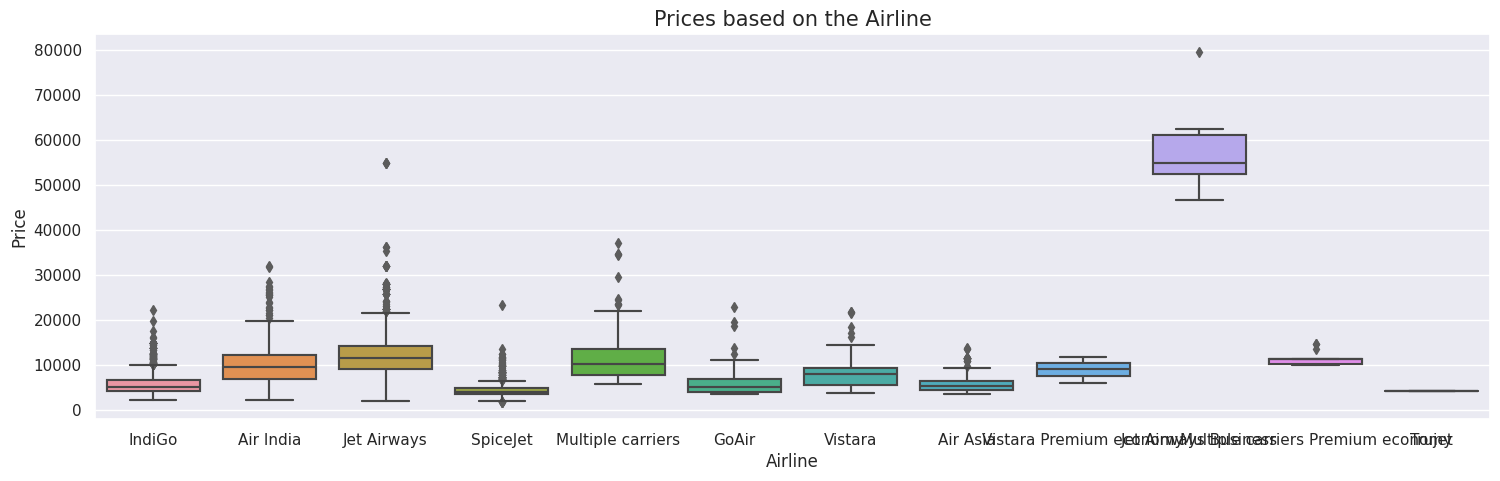

In [127]:
plt.figure(figsize=(18,5))
sns.boxplot(x='Airline',y='Price',data=df,palette='hls')
sns.boxplot(data=df, y="Price", x="Airline",showfliers=False).set_title("Prices based on the Airline", fontsize=15)
plt.show()

## Insights:
* Jet Airways has maximum price range, followed by Air India.
* Indigo, GoAir and Vistara has same price range.

# Distribution of Data

## Violin Plot

In [131]:
import plotly.express as px

# Define a list of custom colors
custom_colors = ["red", "blue", "green", "purple"]

# Assuming 'df' is your DataFrame
fig = px.violin(df, x="Price", color_discrete_sequence=[custom_colors[0]])
fig.show()


### Insights


*   Most of our Price lies between 4k to 18k
*   median price for flight ticket is 8372
* Maximum probability density is associated with kde=0.998


#Correlation Heatmap

<ipython-input-136-f428b0c4efe7>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



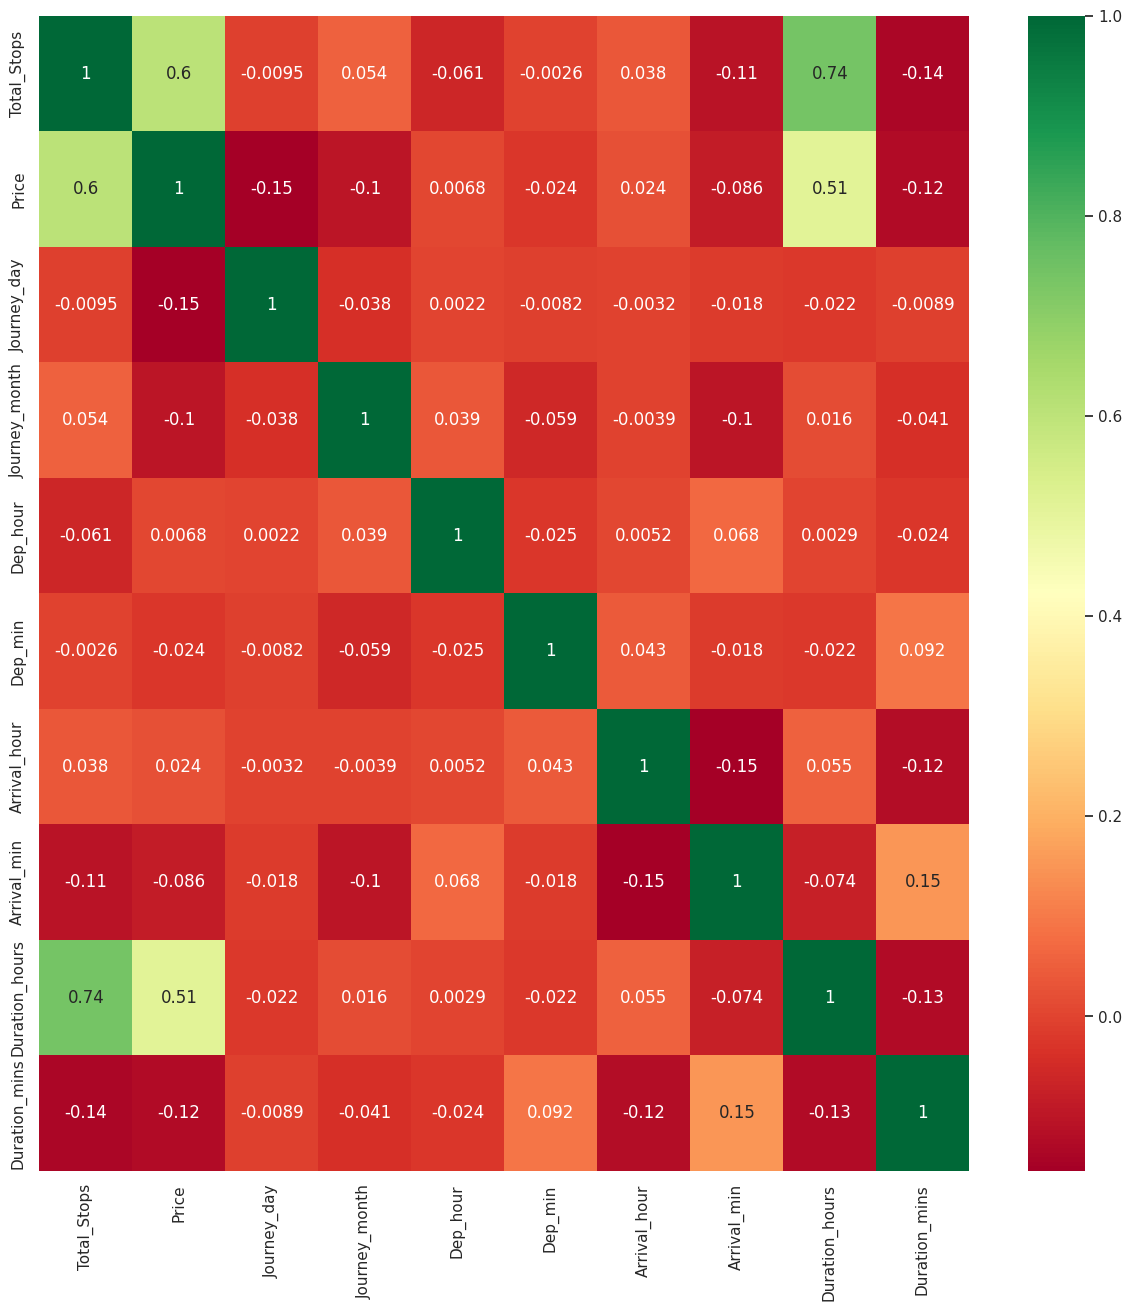

In [136]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (15,15))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()